In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
df = pd.read_csv('fake_job_postings.csv')

In [3]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
job_id                 17880 non-null int64
title                  17880 non-null object
location               17534 non-null object
department             6333 non-null object
salary_range           2868 non-null object
company_profile        14572 non-null object
description            17879 non-null object
requirements           15185 non-null object
benefits               10670 non-null object
telecommuting          17880 non-null int64
has_company_logo       17880 non-null int64
has_questions          17880 non-null int64
employment_type        14409 non-null object
required_experience    10830 non-null object
required_education     9775 non-null object
industry               12977 non-null object
function               11425 non-null object
fraudulent             17880 non-null int64
dtypes: int64(5), object(13)
memory usage: 2.5+ MB


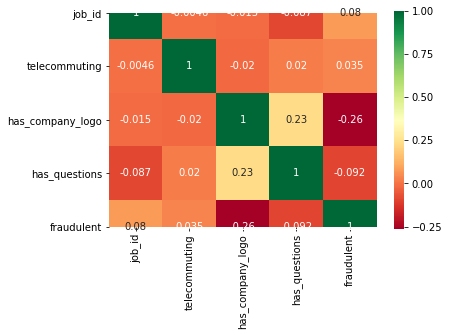

In [5]:
sns.heatmap(df.corr(),square=True,cmap='RdYlGn',annot=True)

In [6]:
# Missing values
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
# Deliting column "salary_range", because there is no 84% information of all observation.
df.drop(['salary_range'], axis='columns', inplace=True)

In [8]:
# Deliting column "job_id", because it doen`t help in analysis
df.drop(['job_id'], axis ='columns',inplace= True)

In [9]:
# Fill missing values
df.fillna(" ",inplace = True)

In [10]:
# Number of  real and fakejob
df["fraudulent"].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

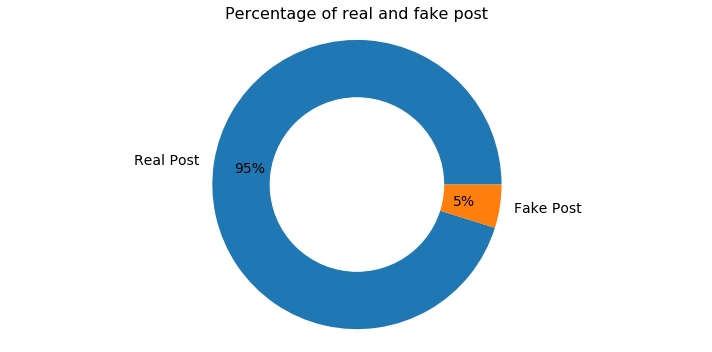

In [11]:
# Percentage of  real and fake job
fraudulent_plot = df["fraudulent"].value_counts().plot(kind='pie', figsize=(10,5), autopct="%.0f%%", pctdistance = 0.75, textprops={'fontsize': 14},labels=['Real Post', 'Fake Post'])
fraudulent_plot.set_title('Percentage of real and fake post', fontsize=16)
fraudulent_plot.set_ylabel('')
circle = plt.Circle((0,0), 0.6, color='white')
fraudulent_plot.add_artist(circle)
plt.axis('equal')
plt.tight_layout()

In [12]:
# Сombine words from all columns into 2 list (fake/real words)
df['text'] = df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'] + ' ' + df['employment_type'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function']


fake_words = df[df.fraudulent == 1].text
real_words = df[df.fraudulent == 0].text

In [13]:
# Number of fake words
str_fakewords = ''
for i in fake_words:
    for j in i:
        str_fakewords += j
len(str_fakewords)   

1856538

In [14]:
# Number of real words
str_realwords = ''
for i in real_words:
    for j in i:
        str_realwords += j
len(str_realwords)  

47087362

(-0.5, 899.5, 599.5, -0.5)

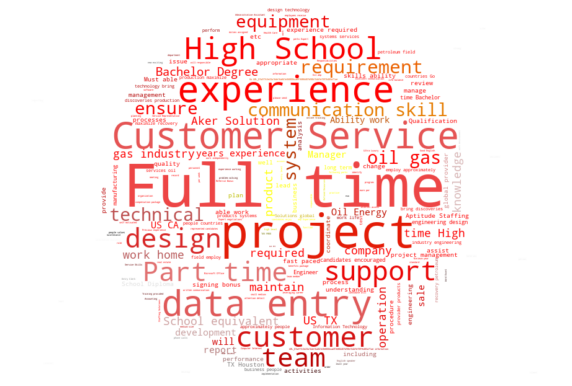

In [72]:
from PIL import Image, ImageDraw
from os import path, getcwd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap

image_mask  = np.array(Image.open('stop.png'))
wordcloud2 = WordCloud(background_color="white", mask=image_mask, max_words = 200, contour_color='').generate(str_fakewords)   #,width=1987, height=736


image_colors = ImageColorGenerator(image_mask)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud2.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

(-0.5, 499.5, 499.5, -0.5)

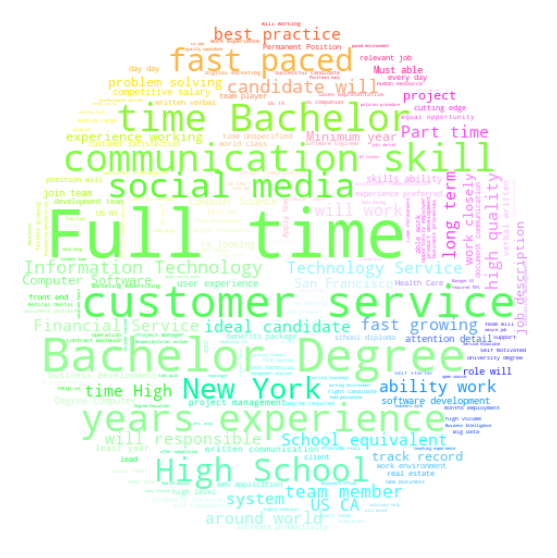

In [69]:
image_mask2  = np.array(Image.open('circle.png'))
wordcloud_ = WordCloud(background_color="white", mask=image_mask2, max_words = 200, contour_color='').generate(str_realwords)   


image_colors = ImageColorGenerator(image_mask2)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")